In [1]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

In [2]:
data=pd.read_csv('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/동계인턴십_Data_1000/phenotype_1000.txt',engine="python",sep=" ")

In [3]:
df=data.loc[:,['AGE_B', 'SMOK_B', 'ALCO_B','EXER_B','HT_B', 'WT_B', 'WAIST_B', 'SBP_B', 'DBP_B', 'CHO_B','LDL_B', 'TG_B', 'HDL_B', 'FBS_B', 'GOT_B', 'GPT_B', 'GGT_B', 'URIC_B','BIL', 'WBC', 'CREAT', 'STOMA', 'COLON', 'LIVER', 'LUNG','PROST', 'THROI', 'BREAC', 'RECTM','SEX1', 'CRC']]
df.head()

,AGE_B,SMOK_B,ALCO_B,EXER_B,HT_B,WT_B,WAIST_B,SBP_B,DBP_B,CHO_B,...,STOMA,COLON,LIVER,LUNG,PROST,THROI,BREAC,RECTM,SEX1,CRC
0,48,3.0,2.0,1.0,168.0,69.8,82.0,102.0,69.0,196.0,...,0,0,0,0,0,0,0,0,1,0
1,53,1.0,2.0,1.0,161.0,67.9,86.0,127.0,67.0,159.0,...,0,0,0,0,0,0,1,0,2,0
2,60,1.0,1.0,2.0,153.0,73.3,97.0,133.0,76.0,198.0,...,0,0,0,0,0,0,0,0,2,0
3,42,1.0,2.0,2.0,167.0,65.1,77.5,97.0,70.0,139.0,...,1,0,0,0,0,0,0,0,1,0
4,57,3.0,2.0,2.0,165.0,51.8,73.0,98.0,76.0,166.0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
df.dropna(inplace=True)

train/test data set 분할
먼저 전체 데이터 프레임에서 타겟값을 제외한 나머지 columns을 X_df로 설정하고, LUNG을 y_df로 설정한다.

In [5]:
#폐암 
features=['LUNG','STOMA','COLON','LIVER','LUNG','PROST','THROI','BREAC','RECTM']
y_df =df['STOMA']
X_df =df.drop(features, axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size=0.2)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#분류 모델
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix,classification_report #정오분류표
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score #정확도,민감도
from sklearn.metrics import roc_curve, auc #ROC 곡선 그리기

#최적화
from sklearn.model_selection import learning_curve,validation_curve #학습곡선, 검증곡선
from sklearn.model_selection import GridSearchCV #하이퍼파라미터 튜닝
from sklearn.model_selection import cross_val_score #교차타당도 #추가

투표 기법 사용

In [9]:
logistic = LogisticRegression(solver='liblinear',penalty='l2')
tree = DecisionTreeClassifier(max_depth=None,criterion='entropy')
knn = KNeighborsClassifier(n_neighbors=1,p=2,metric='minkowski')
forest = RandomForestClassifier()
adaboost = AdaBoostClassifier()
voting_estimators = [('logistic',logistic),('tree',tree),('knn',knn)]
voting = VotingClassifier(estimators=voting_estimators,voting='soft')
#소프트 보팅 이용 (분류기들의 레이블)
#투표 기법 사용
a_clf_labels = ['Logistic regression','Decision tree','KNN','Majority voting']
a_all_clf = [logistic,tree,knn,voting]

#배깅
b_clf_labels = ['Decision tree','Random forest']
b_all_clf = [tree,forest]

#부스팅
c_clf_labels = ['Decision tree','Ada boost']
c_all_clf = [tree,adaboost]

In [10]:
for clf, label in zip(a_all_clf,a_clf_labels):
    scores = cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,scoring='roc_auc')
    print('ROC AUC: %0.3f (sd : %0.3f),[%s]' %(scores.mean(),scores.std(),label))

ROC AUC: 0.616 (sd : 0.142),[Logistic regression]
ROC AUC: 0.505 (sd : 0.056),[Decision tree]
ROC AUC: 0.520 (sd : 0.066),[KNN]
ROC AUC: 0.623 (sd : 0.110),[Majority voting]


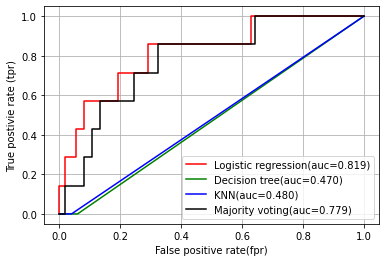

In [11]:
colors=['r','g','b','black']
for clf,label,clr in zip(a_all_clf,a_clf_labels,colors):
    clf.fit(X_train,y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    roc_auc=auc(x=fpr,y=tpr)
    plt.plot(fpr,tpr,color=clr,label='%s(auc=%0.3f)'%(label,roc_auc))

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('False positive rate(fpr)')
plt.ylabel('True postivie rate (tpr)')
plt.show()

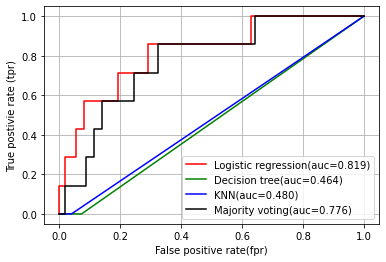

In [12]:
colors=['r','g','b','black']
for clf,label,clr in zip(a_all_clf,a_clf_labels,colors):
    clf.fit(X_train,y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    roc_auc=auc(x=fpr,y=tpr)
    plt.plot(fpr,tpr,color=clr,label='%s(auc=%0.3f)'%(label,roc_auc))

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('False positive rate(fpr)')
plt.ylabel('True postivie rate (tpr)')
plt.show()

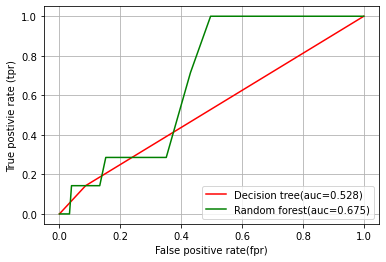

In [13]:
colors=['r','g']
for clf,label,clr in zip(b_all_clf,b_clf_labels,colors):
    clf.fit(X_train,y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    roc_auc=auc(x=fpr,y=tpr)
    plt.plot(fpr,tpr,color=clr,label='%s(auc=%0.3f)'%(label,roc_auc))

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('False positive rate(fpr)')
plt.ylabel('True postivie rate (tpr)')
plt.show()

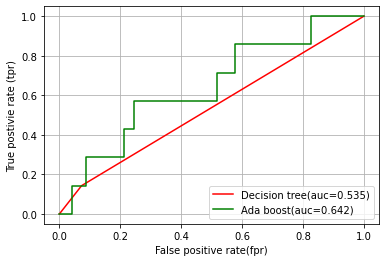

In [14]:
colors=['r','g']
for clf,label,clr in zip(c_all_clf,c_clf_labels,colors):
    clf.fit(X_train,y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    roc_auc=auc(x=fpr,y=tpr)
    plt.plot(fpr,tpr,color=clr,label='%s(auc=%0.3f)'%(label,roc_auc))

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('False positive rate(fpr)')
plt.ylabel('True postivie rate (tpr)')
plt.show()

randomforest의 경우의 중요도를 선택하였다.

In [15]:
feat_labels= X_df.columns
importance =forest.feature_importances_
indices=np.argsort(importance)[::-1]
for f in range(X_train.shape[1]):
    print("%3d) %-*s %f" %(f+1,30,feat_labels[indices[f]],importance[indices[f]]))

  1) TG_B                           0.074942
  2) WAIST_B                        0.065757
  3) AGE_B                          0.065391
  4) GGT_B                          0.062888
  5) URIC_B                         0.061921
  6) CHO_B                          0.061625
  7) FBS_B                          0.061567
  8) GOT_B                          0.061160
  9) LDL_B                          0.060994
 10) WBC                            0.052737
 11) WT_B                           0.052070
 12) SBP_B                          0.049119
 13) HDL_B                          0.047586
 14) CREAT                          0.042084
 15) GPT_B                          0.041518
 16) HT_B                           0.039020
 17) BIL                            0.036056
 18) DBP_B                          0.028723
 19) SMOK_B                         0.012121
 20) ALCO_B                         0.008571
 21) EXER_B                         0.007846
 22) SEX1                           0.005687
 23) CRC  

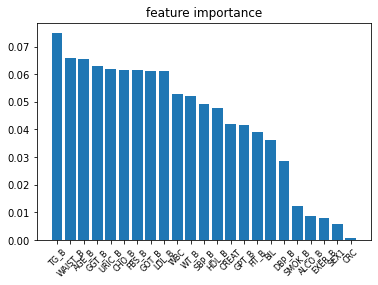

In [16]:
plt.bar(range(X_train.shape[1]),importance[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=45,size=8)
plt.title('feature importance')
plt.show()

중요도 0.05 까지만 잘라서 시행해봤다.

In [17]:
#STOMA
features=['LUNG','STOMA','COLON','LIVER','LUNG','PROST','THROI','BREAC','RECTM']
y_df =df['STOMA']
#X_df =df.drop(features, axis=1)
X_df =df[['GGT_B','FBS_B','LDL_B','GOT_B','TG_B','GPT_B','WAIST_B','AGE_B','CHO_B','WBC','SBP_B','WT_B']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(630, 12) (158, 12)


In [19]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [20]:
params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }

num_rounds = 500

In [21]:
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[23:12:40] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.61750	eval-logloss:0.62358
[1]	train-logloss:0.55452	eval-logloss:0.56212
[2]	train-logloss:0.50118	eval-logloss:0.51225
[3]	train-logloss:0.45618	eval-logloss:0.47052
[4]	train-logloss:0.41839	eval-logloss:0.43676
[5]	train-logloss:0.38516	eval-logloss:0.40723
[6]	train-logloss:0.35677	eval-logloss:0.38330
[7]	train-logloss:0.33195	eval-logloss:0.36171
[8]	train-logloss:0.31047	eval-logloss:0.34437
[9]	train-logloss:0.29154	eval-logloss:0.32884
[10]	train-logloss:0.27471	eval-logloss:0.31619
[11]	train-logloss:0.26003	eval-logloss:0.30543
[12]	train-logloss:0.24665	eval-logloss:0.29584
[13]	train-logloss:0.23497	eval-logloss:0.28671
[14

In [22]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.015 0.    0.033 0.006 0.011 0.005 0.026 0.001 0.002 0.018]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [23]:
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [24]:
get_clf_eval(y_test, preds)

오차행렬:
 [[146   2]
 [ 10   0]]

정확도: 0.9241
정밀도: 0.0000
재현율: 0.0000
F1: 0.0000
AUC: 0.4932


In [25]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [26]:
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [27]:
xgboost.plot_importance(xgb_model)

NotFittedError: need to call fit or load_model beforehand

In [ ]:
y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.02469246000859276

In [ ]:
# accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.84%
